In [1]:
import pandas as pd
import numpy as np

In [2]:
file_url = 'https://raw.githubusercontent.com/PacktWorkshops/The-Data-Science-Workshop/master/Chapter03/bank-full.csv'

In [3]:
dataBank = pd.read_csv(file_url, sep=';')

In [4]:
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [5]:
dataBank.describe()

,age,balance,day,duration,campaign,pdays,previous
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000


In [6]:
dataBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype 
---  ------     --------------  ----- 
 0   age        45211 non-null  int64 
 1   job        45211 non-null  object
 2   marital    45211 non-null  object
 3   education  45211 non-null  object
 4   default    45211 non-null  object
 5   balance    45211 non-null  int64 
 6   housing    45211 non-null  object
 7   loan       45211 non-null  object
 8   contact    45211 non-null  object
 9   day        45211 non-null  int64 
 10  month      45211 non-null  object
 11  duration   45211 non-null  int64 
 12  campaign   45211 non-null  int64 
 13  pdays      45211 non-null  int64 
 14  previous   45211 non-null  int64 
 15  poutcome   45211 non-null  object
 16  y          45211 non-null  object
dtypes: int64(7), object(10)
memory usage: 5.9+ MB


In [7]:
# Normalizing data
from sklearn import preprocessing
#Se hace un cast de los valores tipo int64 a tipo float
x = dataBank[['balance']].values.astype(float)

In [8]:
#Se crea una instancia para un transformador, este en especial normaliza los datos entre 0 y 1
minmaxScaler = preprocessing.MinMaxScaler() 
dataBank['balanceTran'] = minmaxScaler.fit_transform(x)

Es importante recordar que existe otro metodo llamado estandarizacion https://www.analyticsvidhya.com/blog/2020/04/feature-scaling-machine-learning-normalization-standardization/

Este tiene la ventaja de que no es afectado si existe inconsistencia en los datos como un valor negativo o extramadaemente grande



In [9]:
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092259
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073067
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072822
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086476
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072812


Despues de esta variable normalizada, podemos añadir un delta=0.001, esto con el fin de evitar problemas si queremos multiplicar o dividir el valor contra otros numeros, en caso de que exista 0, generaria errores o convertiria todo en 0

In [10]:
#Adding a small numerical constant to eliminate 0 values
dataBank['balanceTran'] = dataBank['balanceTran'] + 0.00001

In [11]:
#Aqui transformaremos las variables de acuerdo a los pesos que se discutieron, un peso de 5
#Para aquellos clientes que no tienen prestamos y un peso de 1 para los que tienen un prestamo
#Esto lo guardamos en una nueva columna
# Let us transform values for loan data
dataBank['loanTran'] = 1
# Giving a weight of 5 if there is no loan
dataBank.loc[dataBank['loan'] == 'no', 'loanTran'] = 5
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5


In [12]:
#Realizamos lo mismo para los datos de las personas que cuentan con una propiedad o no
#Aquellos que si tienen, tendran un peso de 5, en caso contrario 1
dataBank['houseTran'] = 5
dataBank.loc[dataBank['housing'] == 'no', 'houseTran'] = 1
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no,0.092269,5,5
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no,0.073077,5,5
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no,0.072832,1,5
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no,0.086486,5,5
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no,0.072822,5,1


Teniendo estas nuevas variables transformadas `balanceTran`, `loanTran`, `houseTran`. Podemos generar nuestra nueva variable `assetIndex`, un indice general de activos, donde el rango estaria entre 0.001 y 25.025 multiplicandolas.

In [13]:
# Let us now create the new variable which is a product of all these
dataBank['assetIndex'] = dataBank['balanceTran'] * dataBank['loanTran'] * dataBank['houseTran']
dataBank.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,...,duration,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,261,1,-1,0,unknown,no,0.092269,5,5,2.306734
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,151,1,-1,0,unknown,no,0.073077,5,5,1.826916
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,76,1,-1,0,unknown,no,0.072832,1,5,0.364158
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,92,1,-1,0,unknown,no,0.086486,5,5,2.162153
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,198,1,-1,0,unknown,no,0.072822,5,1,0.364112


Teniendo esta variable `assetIndex`, ahora podemos hacer una comparacion individual para que basado en esta, que tan propenso es que un cliente compre un deposito a plazo. Al no ser un dato categorico, podemos adoptar la misma tecnica usada para el saldo de un cliente, determinar los cuantiles y categorizar a los clientes.

In [14]:
# Finding the quantile
q25, q50, q75 = np.quantile(dataBank['assetIndex'],[0.25,0.5,0.75])
print(q25, q50, q75)

0.37668646432916314 0.5692036687669093 1.9027248969549506


In [15]:
dataBank.describe()

,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
count,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000,45211.000000
mean,40.936210,1362.272058,15.806419,258.163080,2.763841,40.197828,0.580323,0.085181,4.359094,3.223353,1.179189
std,10.618762,3044.765829,8.322476,257.527812,3.098021,100.128746,2.303441,0.027643,1.467280,1.987511,0.952080
min,18.000000,-8019.000000,1.000000,0.000000,1.000000,-1.000000,0.000000,0.000010,1.000000,1.000000,0.000010
25%,33.000000,72.000000,8.000000,103.000000,1.000000,-1.000000,0.000000,0.073467,5.000000,1.000000,0.376686
50%,39.000000,448.000000,16.000000,180.000000,2.000000,-1.000000,0.000000,0.076881,5.000000,5.000000,0.569204
75%,48.000000,1428.000000,21.000000,319.000000,3.000000,-1.000000,0.000000,0.085778,5.000000,5.000000,1.902725
max,95.000000,102127.000000,31.000000,4918.000000,63.000000,871.000000,275.000000,1.000010,5.000000,5.000000,15.108152


In [16]:
dataBank['assetClass'] = 'Quant1'
dataBank.loc[(dataBank['assetIndex'] > q25) & (dataBank['assetIndex'] < q50), 'assetClass'] = 'Quant2'
dataBank.loc[(dataBank['assetIndex'] > q50) & (dataBank['assetIndex'] < q75), 'assetClass'] = 'Quant3'
dataBank.loc[dataBank['assetIndex'] > q75, 'assetClass'] = 'Quant4'
dataBank.head()


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0.072822,5,1,0.364112,Quant1


In [17]:
dataBank.assetClass[dataBank['assetIndex'] > 1.9] = 'Quant4'
dataBank.head()

<ipython-input-17-e6cd8af7d963>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  dataBank.assetClass[dataBank['assetIndex'] > 1.9] = 'Quant4'


,age,job,marital,education,default,balance,housing,loan,contact,day,...,campaign,pdays,previous,poutcome,y,balanceTran,loanTran,houseTran,assetIndex,assetClass
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,...,1,-1,0,unknown,no,0.092269,5,5,2.306734,Quant4
1,44,technician,single,secondary,no,29,yes,no,unknown,5,...,1,-1,0,unknown,no,0.073077,5,5,1.826916,Quant3
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,...,1,-1,0,unknown,no,0.072832,1,5,0.364158,Quant1
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,...,1,-1,0,unknown,no,0.086486,5,5,2.162153,Quant4
4,33,unknown,single,unknown,no,1,no,no,unknown,5,...,1,-1,0,unknown,no,0.072822,5,1,0.364112,Quant1


In [18]:
#Ahora tomando esta cagetoria de indice de activos, vamos a ver cual categoria es la que 
#es mas propensa a comprar estos depositos a plazos fijos

In [19]:
# Calculating total of each asset class
assetTot = dataBank.groupby('assetClass')['y'].agg(assetTot='count').reset_index()
# Calculating the category wise counts
assetProp = dataBank.groupby(['assetClass', 'y'])['y'].agg(assetCat='count').reset_index()

In [20]:
# Merging both the data frames
assetComb = pd.merge(assetProp, assetTot, on = ['assetClass'])
assetComb['catProp'] = (assetComb.assetCat / assetComb.assetTot)*100
assetComb

,assetClass,y,assetCat,assetTot,catProp
0,Quant1,no,10171,11312,89.913366
1,Quant1,yes,1141,11312,10.086634
2,Quant2,no,9181,11295,81.283754
3,Quant2,yes,2114,11295,18.716246
4,Quant3,no,10149,11126,91.218767
5,Quant3,yes,977,11126,8.781233
6,Quant4,no,10421,11478,90.791079
7,Quant4,yes,1057,11478,9.208921


De este ultimo analisis, podemos ver que los clientes en el quantil2, son los que son mas propensos a comprar estos depositos a plazos fijos, en comparacion con los demas quantiles

In [21]:
dataBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  int64  
 1   job          45211 non-null  object 
 2   marital      45211 non-null  object 
 3   education    45211 non-null  object 
 4   default      45211 non-null  object 
 5   balance      45211 non-null  int64  
 6   housing      45211 non-null  object 
 7   loan         45211 non-null  object 
 8   contact      45211 non-null  object 
 9   day          45211 non-null  int64  
 10  month        45211 non-null  object 
 11  duration     45211 non-null  int64  
 12  campaign     45211 non-null  int64  
 13  pdays        45211 non-null  int64  
 14  previous     45211 non-null  int64  
 15  poutcome     45211 non-null  object 
 16  y            45211 non-null  object 
 17  balanceTran  45211 non-null  float64
 18  loanTran     45211 non-null  int64  
 19  hous

In [22]:
#Tomamos los datos numericos, ya que la matriz de correlacion solo se puede hacer con datos numericos
bankNumeric = dataBank[['age','balance','day','duration','campaign','pdays','previous','balanceTran','loanTran','houseTran','assetIndex']]

In [23]:
from pandas import set_option
set_option('display.width',150) #Con set option establecemos opciones como el ancho del dataFrame, la precision de los datos
set_option('precision',3)
bankCorr = bankNumeric.corr(method = 'pearson')
bankCorr

,age,balance,day,duration,campaign,pdays,previous,balanceTran,loanTran,houseTran,assetIndex
age,1.000,0.098,-0.009,-0.005,0.005,-0.024,0.001,0.098,0.016,-0.186,-0.112
balance,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,1.000,0.084,-0.069,0.311
day,-0.009,0.005,1.000,-0.030,0.162,-0.093,-0.052,0.005,-0.011,-0.028,-0.019
duration,-0.005,0.022,-0.030,1.000,-0.085,-0.002,0.001,0.022,0.012,0.005,0.017
campaign,0.005,-0.015,0.162,-0.085,1.000,-0.089,-0.033,-0.015,-0.010,-0.024,-0.026
pdays,-0.024,0.003,-0.093,-0.002,-0.089,1.000,0.455,0.003,0.023,0.124,0.101
previous,0.001,0.017,-0.052,0.001,-0.033,0.455,1.000,0.017,0.011,0.037,0.034
balanceTran,0.098,1.000,0.005,0.022,-0.015,0.003,0.017,1.000,0.084,-0.069,0.311
loanTran,0.016,0.084,-0.011,0.012,-0.010,0.023,0.011,0.084,1.000,-0.041,0.416
houseTran,-0.186,-0.069,-0.028,0.005,-0.024,0.124,0.037,-0.069,-0.041,1.000,0.740


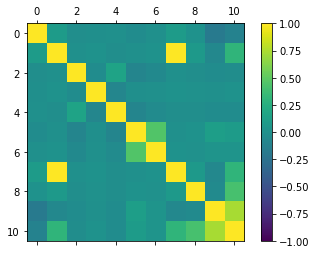

In [24]:
from matplotlib import pyplot
corFig = pyplot.figure()
figAxis = corFig.add_subplot(111)
corAx = figAxis.matshow(bankCorr,vmin=-1,vmax=1)
corFig.colorbar(corAx)
pyplot.show()

In [25]:
# Skewness of numeric attributes
bankNumeric.skew()

age             0.685
balance         8.360
day             0.093
duration        3.144
campaign        4.899
pdays           2.616
previous       41.846
balanceTran     8.360
loanTran       -1.853
houseTran      -0.225
assetIndex      1.221
dtype: float64

El indice de sesgo indica que cualquier valor cercano a 0 indica un bajo grado de sesgo, valores positivos indican (right-skew)Asimetria positiva, y valores negativos indican (left-skew) Asimetria negativa. 

Los valores que indiquenvalores altos de sesgo izquierdo o derecho, son candidatos  a una inegnieria de caracteristicas para normalizacion, estos sesgos pueden verse con histogramas o graficos de densidad.

## Histogramas

Text(0.5, 1.0, 'Distribution of Asset Index')

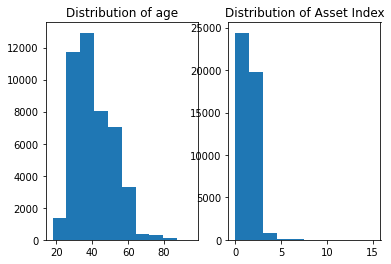

In [26]:
# Histograms

import matplotlib.pyplot as plt
fig, axs = plt.subplots(1,2)

axs[0].hist(bankNumeric['age'])
axs[0].set_title('Distribution of age')

axs[1].hist(bankNumeric['assetIndex'])
axs[1].set_title('Distribution of Asset Index')

Text(0.5, 1.0, 'Distribution of balance')

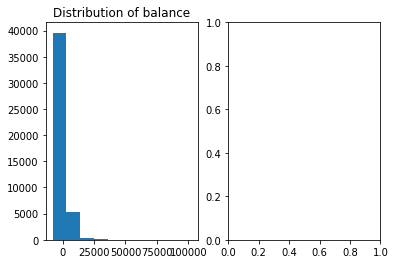

In [27]:
fig, axs1 = plt.subplots(1,2)

axs1[0].hist(bankNumeric['balance'])
axs1[0].set_title('Distribution of balance')



Podemos ver que el indice de bienes esta mas positivamente sesgado, al igual que el balance por lo que es un posible candidato a normalizacion.

### Graficos de densidad

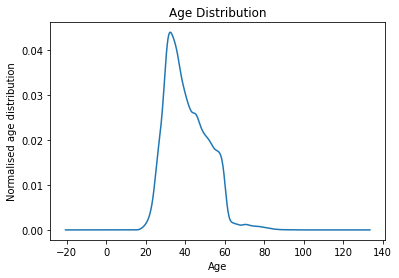

In [28]:
# Density plots
bankNumeric['age'].plot(kind = 'density',subplots = False,layout = (1,1))
plt.title('Age Distribution')
plt.xlabel('Age')
plt.ylabel('Normalised age distribution')
pyplot.show()

Estos graficos de densidad una visualizacion mas suave de la distribución de los datos, podemos ver que esta es mas parecida a una distribucion similar a la de campana.

### Standard Scaler and Normalization Tecnhiques for feature engineering

In [29]:
# Standardize data ( 0 mean, 1 stdev)
from sklearn.preprocessing import StandardScaler
from numpy import set_printoptions
scaling = StandardScaler().fit(bankNumeric)
rescaledNum = scaling.transform(bankNumeric)
set_printoptions(precision = 3)
print(rescaledNum)

[[ 1.607  0.256 -1.298 ...  0.437  0.894  1.184]
 [ 0.289 -0.438 -1.298 ...  0.437  0.894  0.68 ]
 [-0.747 -0.447 -1.298 ... -2.289  0.894 -0.856]
 ...
 [ 2.925  1.43   0.143 ...  0.437 -1.119 -0.584]
 [ 1.513 -0.228  0.143 ...  0.437 -1.119 -0.824]
 [-0.371  0.528  0.143 ...  0.437 -1.119 -0.715]]


In [30]:
# Normalizing Data ( Length of 1)
from sklearn.preprocessing import Normalizer
normaliser = Normalizer().fit(bankNumeric)
normalisedNum = normaliser.transform(bankNumeric)

set_printoptions(precision = 3)
print(normalisedNum)

[[2.686e-02 9.923e-01 2.315e-03 ... 2.315e-03 2.315e-03 1.068e-03]
 [2.747e-01 1.810e-01 3.121e-02 ... 3.121e-02 3.121e-02 1.141e-02]
 [3.966e-01 2.404e-02 6.010e-02 ... 1.202e-02 6.010e-02 4.377e-03]
 ...
 [1.235e-02 9.805e-01 2.917e-03 ... 8.579e-04 1.716e-04 1.070e-04]
 [6.775e-02 7.940e-01 2.021e-02 ... 5.943e-03 1.189e-03 4.688e-04]
 [1.234e-02 9.906e-01 5.668e-03 ... 1.667e-03 3.334e-04 1.664e-04]]


La salida del **standard scaler** esta normalizada a lo largo de las columnas, si observamos las salidas, se puede ver que cada valor a lo largo de una columna esta normalizado, entonces tenemos una media de 0 y desviacion estandar de 1. De esta forma podemos comparar mas facil a traves de las columnas. 

Por ejemplo la variable de edad va entre 18 y 95, y el balance entre -8,019 hasta 102,127. Podemos ver que son escalas diferentes que no son faciles de comparar, con esta función de standar scaler convertimos estos puntos en una escala comun para poder comparar la distribucion de los datos

**Nomalizer** reescala cada fila, asi para tener un vector de longitud 1.

Estas operaciones son necesarias en algunos datos porque muchos algoritmos de machine learning convergen mas rapido cuando las caracteristicas son de una escala similar o normalmente distribuida. 

Estandarizar es ma util para algoritmos que asumen como entrada variables con una estructura Gaussiana, algoritmos como, regresion lineal, regresion logaritmica.

Las tecncias de normalizacion son mas utiles para datasets dispersos (datasets con muchos 0's), con algoritmos como k-nearest neighbors o redes neuronales



# Codigo implementado para la actividad

In [31]:
dataBank.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 22 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   age          45211 non-null  int64  
 1   job          45211 non-null  object 
 2   marital      45211 non-null  object 
 3   education    45211 non-null  object 
 4   default      45211 non-null  object 
 5   balance      45211 non-null  int64  
 6   housing      45211 non-null  object 
 7   loan         45211 non-null  object 
 8   contact      45211 non-null  object 
 9   day          45211 non-null  int64  
 10  month        45211 non-null  object 
 11  duration     45211 non-null  int64  
 12  campaign     45211 non-null  int64  
 13  pdays        45211 non-null  int64  
 14  previous     45211 non-null  int64  
 15  poutcome     45211 non-null  object 
 16  y            45211 non-null  object 
 17  balanceTran  45211 non-null  float64
 18  loanTran     45211 non-null  int64  
 19  hous

Aqui en este punto ya tenemos nuestro dataset formado con las nuevas caracteristicas que se generaron desde la perspectiva de negocion. Ahora haremos que este dataset sea con el que entrenemos nuestro modelo

1. Primero, convertiremos los datos categoricos en variables ficticias (duumy variables)

In [32]:
# Converting all the categorical variables to dummy variables
# No vamos a incluir 'house' y 'loan', puesto que para generar las nuevas caracteristicas estas fueron las que se usaron

bankCat = pd.get_dummies(dataBank[['job','marital','education','default','contact','month','poutcome']])
bankCat.shape

(45211, 40)

In [33]:
bankCat.head()

,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


In [34]:
#Ahora extraemos los datos numericos
#Como primer pueba solo incluiremos assetIndex, no se incluiran las caracteristicas que se generaron para 
#poder generar 'assetIndex', ya que estan incluidos de forma numerica como 'age' y  'balance'
# bankNum = dataBank[['age','balance','day','duration','campaign','pdays','previous','assetIndex']] #Test1
bankNum = dataBank[['age','day','duration','campaign','pdays','previous','assetIndex']] #Test2
bankNum.shape

(45211, 7)

In [35]:
bankNum.head()

,age,day,duration,campaign,pdays,previous,assetIndex
0,58,5,261,1,-1,0,2.307
1,44,5,151,1,-1,0,1.827
2,33,5,76,1,-1,0,0.364
3,47,5,92,1,-1,0,2.162
4,33,5,198,1,-1,0,0.364


In [36]:
bankNum.describe()

,age,day,duration,campaign,pdays,previous,assetIndex
count,45211.000,45211.000,45211.000,45211.000,45211.000,45211.000,4.521e+04
mean,40.936,15.806,258.163,2.764,40.198,0.580,1.179e+00
std,10.619,8.322,257.528,3.098,100.129,2.303,9.521e-01
min,18.000,1.000,0.000,1.000,-1.000,0.000,1.000e-05
25%,33.000,8.000,103.000,1.000,-1.000,0.000,3.767e-01
50%,39.000,16.000,180.000,2.000,-1.000,0.000,5.692e-01
75%,48.000,21.000,319.000,3.000,-1.000,0.000,1.903e+00
max,95.000,31.000,4918.000,63.000,871.000,275.000,1.511e+01


In [37]:
#Aqui podemos transformar algunas de las variables numericas con el transfromador MinMaxScaler()
#Pero como sabemos cuales transformar?

#Despues de correrlo la primera vez, nos dimos cuenta que aun cuando se incluyo la variable de assetIndex, el
#desempeño no mejor, por lo que ahora para una segunda vez, vamos a normalizar entre 0 y 1 las variables

#Age, dat y duration son las que tienen escalas muy disparadas, convertiremos estas
minmaxScaler = preprocessing.MinMaxScaler()
ageT1 = bankNum[['age']].values.astype(float)
dayT1 = bankNum[['day']].values.astype(float)
durT1 = bankNum[['duration']].values.astype(float)

bankNum['ageTran'] = minmaxScaler.fit_transform(ageT1)
bankNum['dayTran'] = minmaxScaler.fit_transform(dayT1)
bankNum['durTran'] = minmaxScaler.fit_transform(durT1)

print(bankNum)

       age  day  duration  campaign  pdays  previous  assetIndex  ageTran  dayTran  durTran
0       58    5       261         1     -1         0       2.307    0.519    0.133    0.053
1       44    5       151         1     -1         0       1.827    0.338    0.133    0.031
2       33    5        76         1     -1         0       0.364    0.195    0.133    0.015
3       47    5        92         1     -1         0       2.162    0.377    0.133    0.019
4       33    5       198         1     -1         0       0.364    0.195    0.133    0.040
...    ...  ...       ...       ...    ...       ...         ...      ...      ...      ...
45206   51   17       977         3     -1         0       0.402    0.429    0.533    0.199
45207   71   17       456         2     -1         0       0.443    0.688    0.533    0.093
45208   72   17      1127         5    184         3       0.623    0.701    0.533    0.229
45209   57   17       508         4     -1         0       0.394    0.506    0.5

<ipython-input-37-89fb6b2f7def>:13: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankNum['ageTran'] = minmaxScaler.fit_transform(ageT1)
<ipython-input-37-89fb6b2f7def>:14: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  bankNum['dayTran'] = minmaxScaler.fit_transform(dayT1)
<ipython-input-37-89fb6b2f7def>:15: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.

In [38]:
#Ahora en una nueva variable, seleccionaremos las caracteristicas transformadas en lugar de las no normalizadas
bankNum1 = bankNum[['ageTran','dayTran','durTran','campaign','pdays','previous','assetIndex']]
bankNum1.head()

,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0.519,0.133,0.053,1,-1,0,2.307
1,0.338,0.133,0.031,1,-1,0,1.827
2,0.195,0.133,0.015,1,-1,0,0.364
3,0.377,0.133,0.019,1,-1,0,2.162
4,0.195,0.133,0.040,1,-1,0,0.364


In [39]:
# Preparing the X variables
X = pd.concat([bankCat, bankNum1], axis=1) #Los datos numericos y categoricos en X
print(X.shape)
# Preparing the Y variable
Y = dataBank['y'] #Este es nuetro target o label
print(Y.shape)
X.head()

(45211, 47)
(45211,)


,job_admin.,job_blue-collar,job_entrepreneur,job_housemaid,job_management,job_retired,job_self-employed,job_services,job_student,job_technician,...,poutcome_other,poutcome_success,poutcome_unknown,ageTran,dayTran,durTran,campaign,pdays,previous,assetIndex
0,0,0,0,0,1,0,0,0,0,0,...,0,0,1,0.519,0.133,0.053,1,-1,0,2.307
1,0,0,0,0,0,0,0,0,0,1,...,0,0,1,0.338,0.133,0.031,1,-1,0,1.827
2,0,0,1,0,0,0,0,0,0,0,...,0,0,1,0.195,0.133,0.015,1,-1,0,0.364
3,0,1,0,0,0,0,0,0,0,0,...,0,0,1,0.377,0.133,0.019,1,-1,0,2.162
4,0,0,0,0,0,0,0,0,0,0,...,0,0,1,0.195,0.133,0.040,1,-1,0,0.364


In [40]:
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split

#Teniendo el dataFrame listo, ahora procedemos a separar nuestro dataset en el set de entramiento y el de prueba
# Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.3, random_state=123)

In [41]:
# bankModel = LogisticRegression(max_iter=10000)
bankModel = LogisticRegression(max_iter=10000) #Instanciamos al modelo
bankModel.fit(X_train, y_train)  #Ajustamos los datos de entranemiento al modelo 

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=10000,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [42]:
#Teniendo el modelo, procedemos a predecir los valores para el set de test
#y comparamos los valores predecidos con los que tenian que salir y obtenemos una puntuacion
pred = bankModel.predict(X_test)
print('Accuracy of Logistic regression model prediction on test set: {:.2f}'.format(bankModel.score(X_test, y_test)))

Accuracy of Logistic regression model prediction on test set: 0.90


### Metricas del modelo 


In [43]:
# Confusion Matrix for the model
from sklearn.metrics import confusion_matrix
confusionMatrix = confusion_matrix(y_test, pred) #Comparamos los valores esperados con los predecidos por el modelo
print(confusionMatrix)

[[11750   248]
 [ 1100   466]]


In [44]:
tn, fp, fn, tp = confusion_matrix(y_test, pred).ravel()
print(f"TN={tn},  FP={fp},  FN={fn}, TP={tp}")

TN=11750,  FP=248,  FN=1100, TP=466


In [45]:
#Ahora para generar el reporte de clasificacion
from sklearn.metrics import classification_report
print(classification_report(y_test, pred))

              precision    recall  f1-score   support

          no       0.91      0.98      0.95     11998
         yes       0.65      0.30      0.41      1566

    accuracy                           0.90     13564
   macro avg       0.78      0.64      0.68     13564
weighted avg       0.88      0.90      0.88     13564



Como se puede ver para el caso de 'Yes', que es el que buscamos mejorar con las nuevas caracteristicas no fue de gran ayuda, ya que el **recall** es de 0.18, por lo que nuestro modelo no es tan capaz de identificar a los 'yes', la precision aumento, es decir que de los poco que identifico fue capaz de mejorar en detectar a los correctos, por lo que nos conseguimos un mejor desempeño, pero no el esperado